# Sleeping health and lifestyle assignmnent

Data Exploration

In [2]:
#Importation of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


#Dataset loading
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
#Data Wrangling
print('Data Shape:')
print(df.shape)

print('Data Info:')
df.info()

Data Shape:
(374, 13)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage

In [14]:
#Explore the data
print(df.head())
print(df.tail())
print(df.sample(5))

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75      

In [9]:
#Check for Duplicates in the Dataset
print(df['Person ID'].unique())
print(df['Person ID'].value_counts())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [12]:
#Handling of missing values
missing_values = df.isnull().sum()
print(missing_values)
df.fillna(value=0, inplace=True)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [4]:
#Standardizing BMI Category Column
df['BMI Category']=df['BMI Category'].replace(['Normal weight','Normal'],'Normal Weight')
print(df['BMI Category'])

0         Overweight
1      Normal Weight
2      Normal Weight
3              Obese
4              Obese
           ...      
369       Overweight
370       Overweight
371       Overweight
372       Overweight
373       Overweight
Name: BMI Category, Length: 374, dtype: object


In [28]:
#Summary Statistics
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Data Visualization

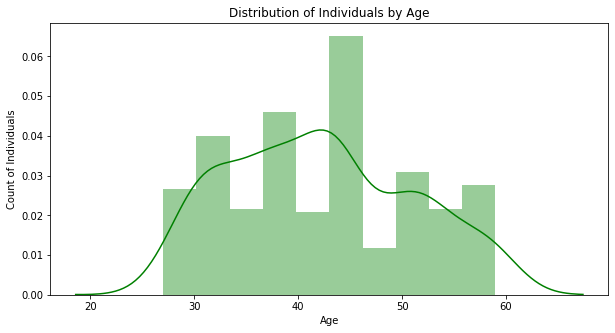

In [32]:
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], bins=10 , color='green')
plt.title('Distribution of Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Count of Individuals')

plt.show()

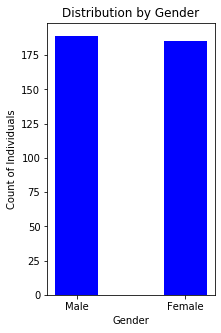

In [2]:
plt.figure(figsize=(3, 5))
gender_counts = df['Gender'].value_counts()
genders = gender_counts.index.to_numpy()
plt.bar(genders,gender_counts, width=0.4, color='blue')
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=0)
plt.show()

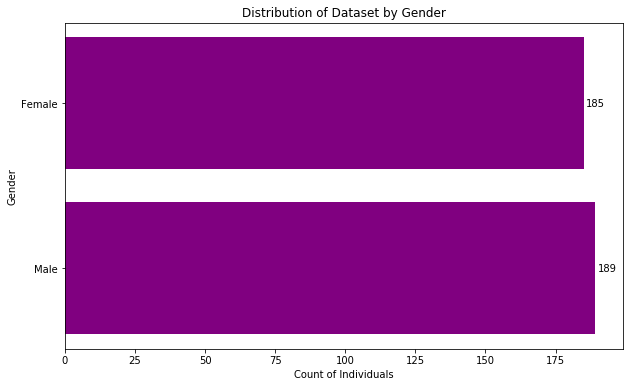

In [17]:
genders = gender_counts.index.to_numpy()
plt.figure(figsize=(10, 6))
plt.barh( genders, gender_counts, color='Purple')
plt.title('Distribution of Dataset by Gender')
plt.xlabel('Count of Individuals')
plt.ylabel('Gender')
for i, (gender, count) in enumerate(gender_counts.items()):
    plt.text(count + 1, i, f'{count}', va='center')
plt.xlim(0, max(gender_counts) + 10)
plt.show()

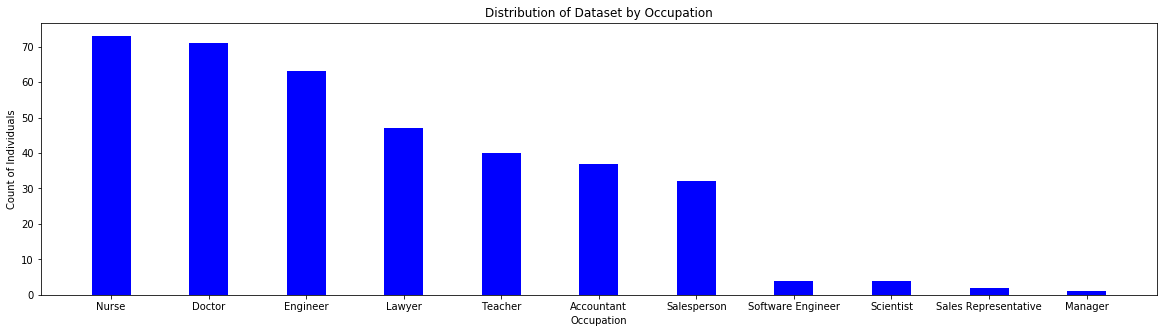

In [3]:
plt.figure(figsize=(20, 5))
gender_counts = df['Occupation'].value_counts()
genders = gender_counts.index.to_numpy()
plt.bar(genders,gender_counts,  width=0.4, color='blue')

plt.title('Distribution of Dataset by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=0)
plt.show()

-From the Distribution by Age histogram above, we can confidently conclude by claiming that the age group with the most individuals is (40-45),this is evident from the tallest bar.

In [3]:
grouped_df = df.groupby(["Gender", pd.cut(df["Age"], bins=[18, 25, 35, 45, 55,65])])
results_df = grouped_df["Sleep Disorder"].value_counts().unstack().fillna(0)
results_df["Total"] = results_df.sum(axis=1)
results_df["None (%)"] = (results_df["None"] / results_df["Total"]) * 100
results_df["Insomnia (%)"] = (results_df["Insomnia"] / results_df["Total"]) * 100
results_df["Sleep Apnea (%)"] = (results_df["Sleep Apnea"] / results_df["Total"]) * 100
print(results_df)
print(results_df.to_markdown(borders=True))

Sleep Disorder   Insomnia  None  Sleep Apnea  Total   None (%)  Insomnia (%)  \
Gender Age                                                                     
Female (25, 35]       2.0   4.0          4.0   10.0  40.000000     20.000000   
       (35, 45]      26.0  39.0          4.0   69.0  56.521739     37.681159   
       (45, 55]       8.0  34.0         31.0   73.0  46.575342     10.958904   
       (55, 65]       0.0   5.0         28.0   33.0  15.151515      0.000000   
Male   (25, 35]       3.0  76.0          5.0   84.0  90.476190      3.571429   
       (35, 45]      36.0  61.0          4.0  101.0  60.396040     35.643564   
       (45, 55]       2.0   0.0          2.0    4.0   0.000000     50.000000   

Sleep Disorder   Sleep Apnea (%)  
Gender Age                        
Female (25, 35]        40.000000  
       (35, 45]         5.797101  
       (45, 55]        42.465753  
       (55, 65]        84.848485  
Male   (25, 35]         5.952381  
       (35, 45]         3.960396  

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

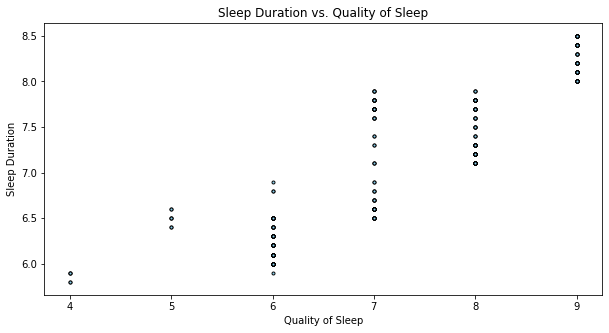

Correlation coefficient: 0.8832130004106171


In [8]:
# Scatter plot for comparing  sleep  duration  vs.  quality of  sleep
plt.figure(figsize=(10,5))
plt.scatter(x='Quality of Sleep', y='Sleep Duration', marker='.',facecolors='skyblue', edgecolors='black',alpha=0.95, data=df)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

# Calculation of the correlation coefficient to determine the strength of the relationship
correlation_coefficient = df['Sleep Duration'].corr(df['Quality of Sleep'])
print("Correlation coefficient:", correlation_coefficient)

From our Scatterplot titled 'Sleep Duration vs. Quality of Sleep' we can strongly claim that there is a strong relationship between longer sleeping hours and higher sleeping quality. Furthermore, to substantiate our claim, a calculation of the correlation coefficient was done and it gave us 0.8832130004106171, which strongly suggest a positive correlation between sleep duration and quality of sleep. Statistically this implies that as sleep duration increases, there's a general trend towards higher quality of sleep, indicating that individuals who sleep longer tend to report higher sleep quality.

BMI Category    Normal Weight  Obese  Overweight
Sleep Disorder                                  
Insomnia                    9      4          64
None                      200      0          19
Sleep Apnea                 7      6          65


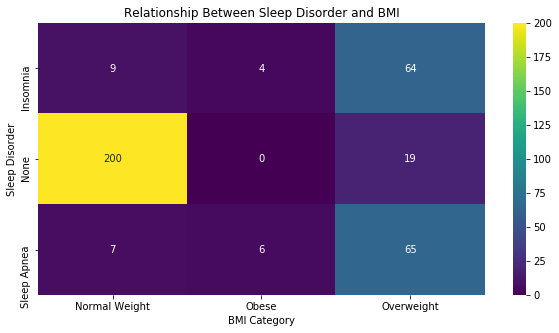

In [14]:
# Cross-tabulation table relationship between sleep disorder prevalence and BMI.
plt.figure(figsize=(10,5))
cross_tab = pd.crosstab(df['Sleep Disorder'], df['BMI Category'])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap= 'viridis',fmt='d')
plt.title('Relationship Between Sleep Disorder and BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Disorder')
plt.show()

From the 'Relationship Between Sleep Disorder and BMI' Heat Map we've observed that insomnia is most common sleep disorder across all BMI categories with the highest prevalence being normal weight followed by overweight and obese individuals, and Sleep apnea appears to be more prevalent in the overweight and obese categories compared to normal weight individuals. With sleep apnea, the heat map shows that individuals with Overweight and Obesity are more likely to have it. However, for "None" category appears to have the highest "None" sleep disorder prevalence.


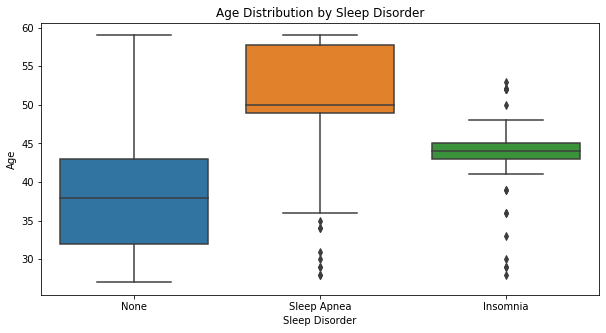

In [15]:
# Age Distribution by Sleep Disorder Box plot
plt.figure(figsize=(10,5))
sns.boxplot(x='Sleep Disorder', y='Age', data=df)
plt.title('Age Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.show()

From the Age Distribution by Sleep Disorder Box plot, it shows that for the "None" category,individuals with age around 40-45 years old, has no sleep disorder. Then for "Insomnia" category median age for individuals with insomnia ranges between 42 and 47 years old and for "Sleep Apnea" category, the median age for individuals with sleep apnea ranges between 50 and 55 years old.

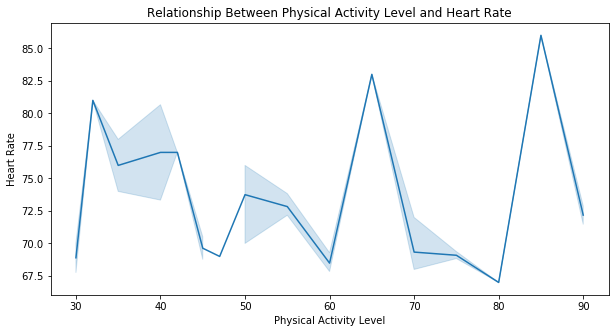

Correlation coefficient: 0.1369709832136317


In [17]:
# Line plot for the relationship between physical activity level and heart rate
plt.figure(figsize=(10,5))
sns.lineplot(x='Physical Activity Level', y='Heart Rate', data=df)
plt.title('Relationship Between Physical Activity Level and Heart Rate')
plt.xlabel('Physical Activity Level')
plt.ylabel('Heart Rate')
plt.show()
correlation_coefficient = df['Physical Activity Level'].corr(df['Heart Rate'])
print("Correlation coefficient:", correlation_coefficient)

From the Line plot for the relationship between physical activity level and heart rate, there are trends where individuals with more physical activity have lower resting heart rates. However, its evident that its a weak positive relationship as quantified by the calculated correlation coefficient of 0.1369709832136317. Which implies that it would be wise to consider that other factors like diet, liefstyle could be influencing the relationship.

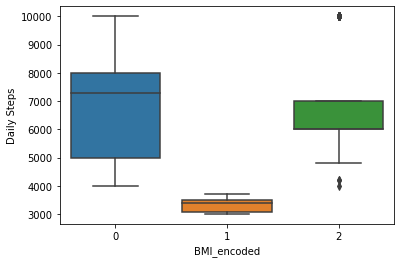

In [20]:
# Daily steps across different BMI categories box plot 
le = LabelEncoder()
df['BMI_encoded'] = le.fit_transform(df['BMI Category'])
sns.boxplot(x='BMI_encoded', y='Daily Steps', data=df)


From the Daily steps across different BMI categories box plot, we can generally conclude that based on the observations, there is a general trend where individuals with higher BMI categories tend to have low daily step counts compared to those with lower BMI categories. Intuitively, variations across the BMI categories has been observed and that can be subjected to be influenced by individuals factors like occupatiothere, age lifestyle etc.

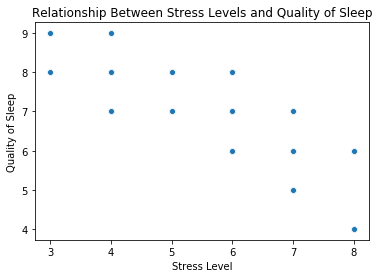

In [21]:
# Stress Levels and Quality of Sleep Scatter plot
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title('Relationship Between Stress Levels and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

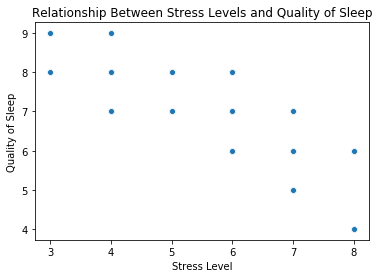

Correlation coefficient: -0.8987520310040437


In [22]:
# Stress Levels and Quality of Sleep Scatter plot
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title('Relationship Between Stress Levels and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()
correlation_coefficient = df['Stress Level'].corr(df['Quality of Sleep'])
print("Correlation coefficient:", correlation_coefficient)

From the Stress Levels and Quality of Sleep Scatter plot, we claim that higher stress correlate with lower sleep quality establishing a relationshi that is as stress levels increase, individuals tend to experience lower quality sleep.Furthermore, based on the calculated correlation coefficient of -0.8987520310040437, its evident that there is a strong negative realtionship.  Based on the scatter plot, there does seem to be a general trend suggesting that higher stress levels correlate with lower sleep quality.

In [13]:
import scipy.stats as stats

# Calculate the correlation coefficient
correlation_coefficient = df['Stress Level'].corr(df['Quality of Sleep'])

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.pearsonr(df['Stress Level'], df['Quality of Sleep'])

# Print the results
print("Correlation coefficient:", correlation_coefficient)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Correlation coefficient: -0.8987520310040437
t-statistic: -0.8987520310040416
p-value: 2.8801242409431244e-135
